In [1]:
import functions
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter, filtfilt, butter
from hosd_python.hosd import apply_hosd # library that I converted from MATLAB
from copy import deepcopy
import scipy.stats as stats
from autoencoder.data.tdms_to_npy_scaling import patch_matrix

In [49]:
path = 'patient_ICA/P41_R00416_ICA.npy'
patient_ICA = np.load(path)

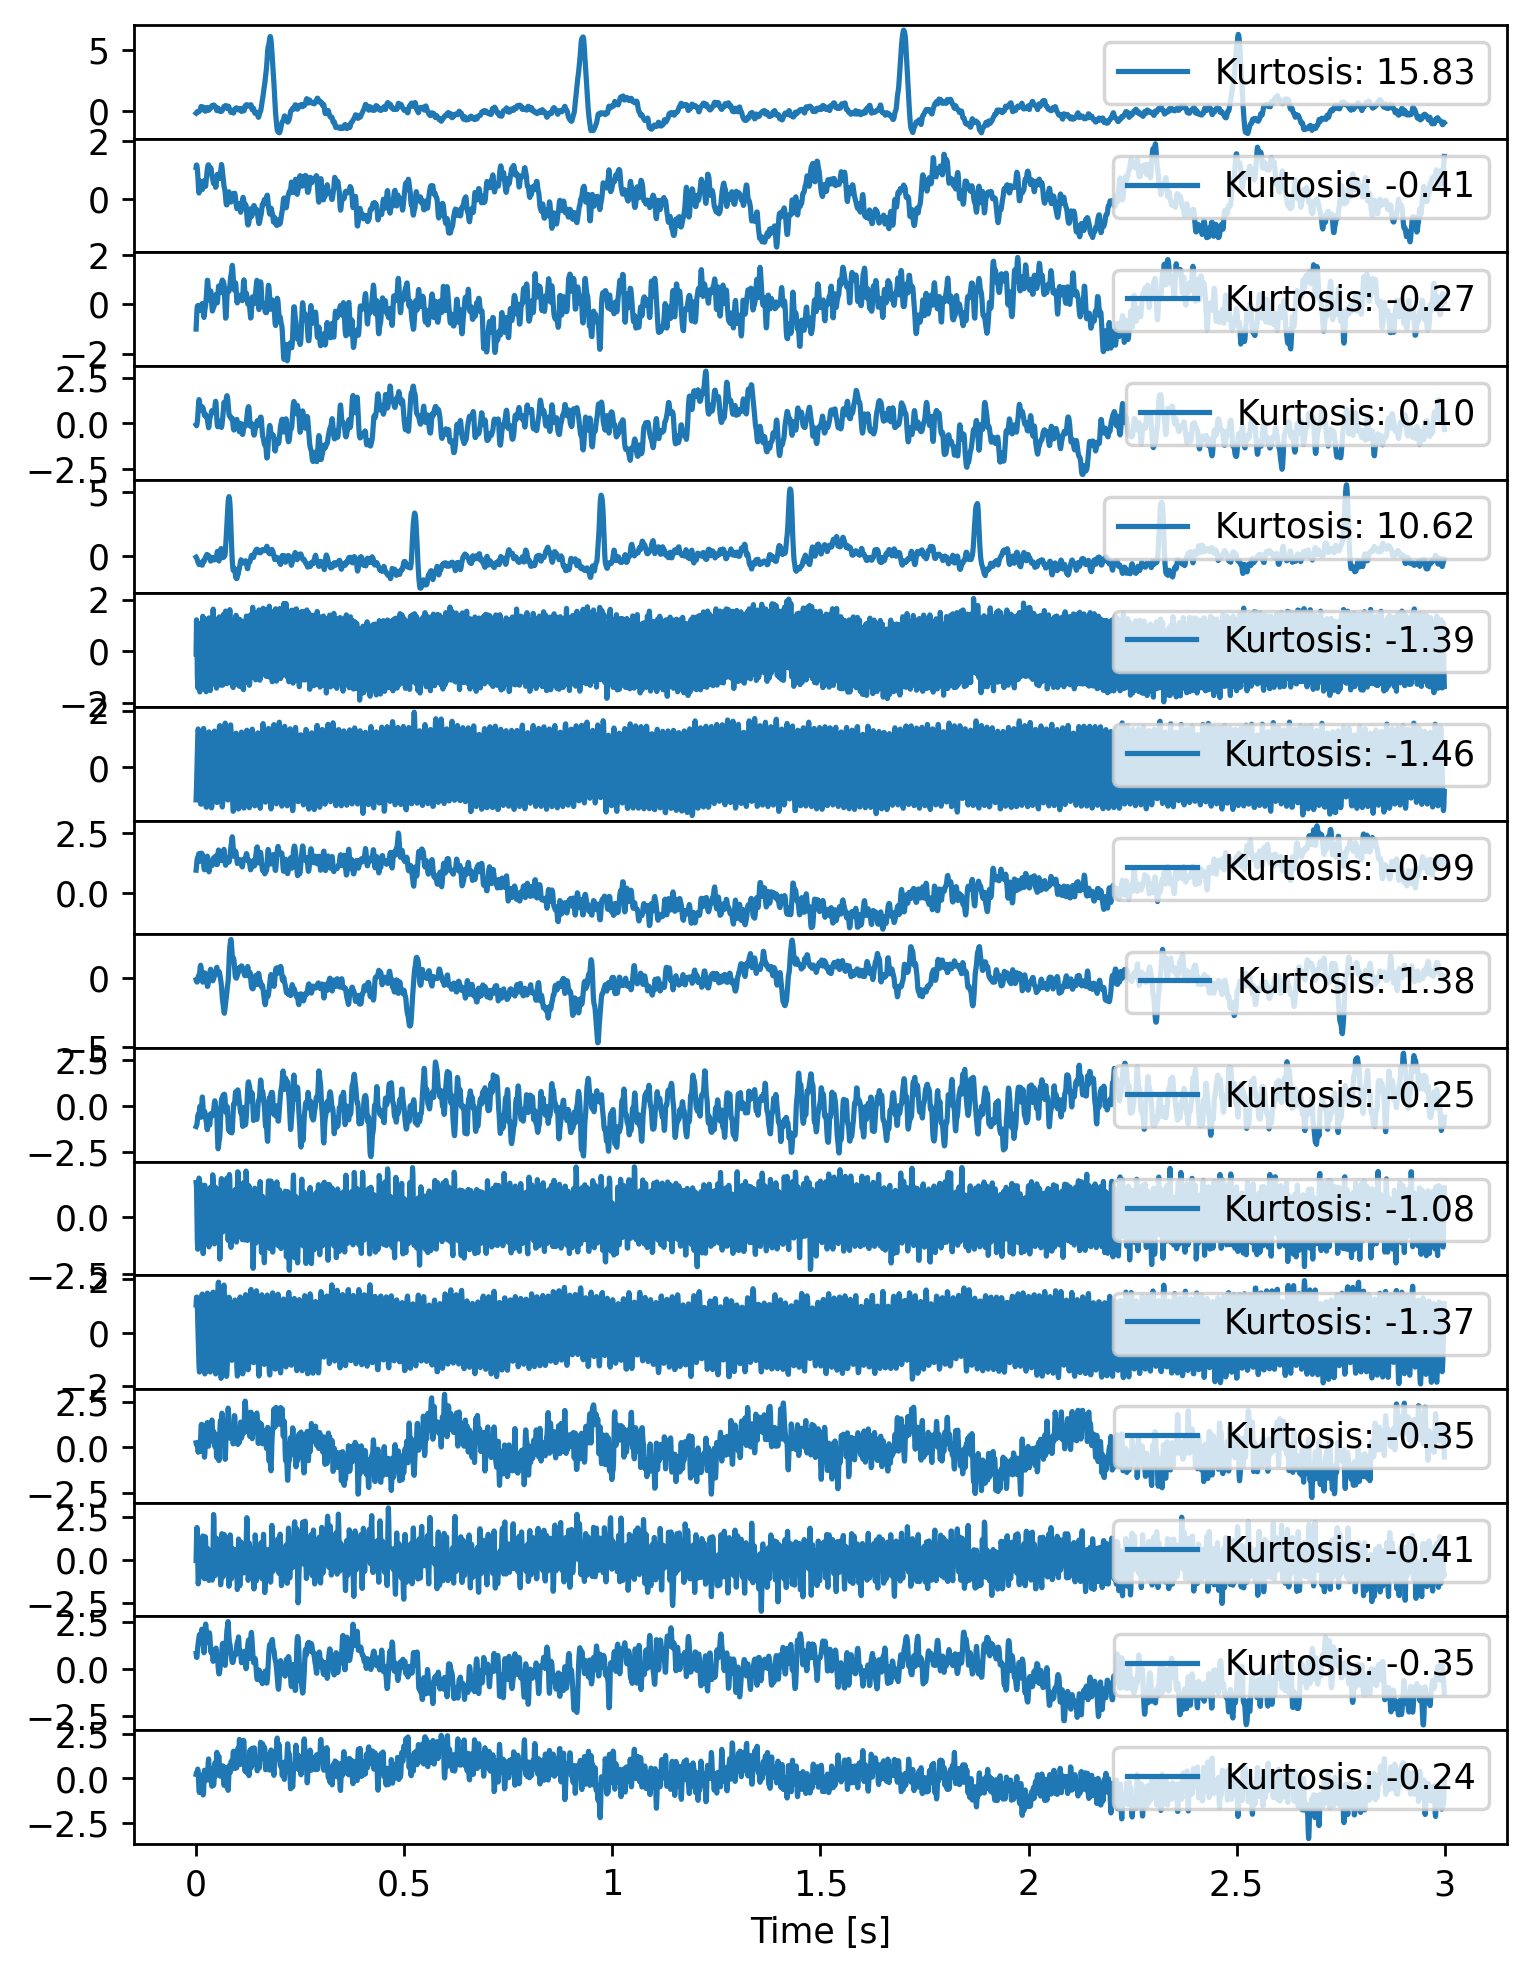

In [50]:
no_ica_chans = patient_ICA.shape[1]
fs=1000
span = 3000
offset = 100*fs 
ms2s = lambda x, _:f'{x/1000:g}' 

# Calculate kurtosis for each channel
kurtosis_values = [stats.kurtosis(patient_ICA[offset:(offset + span), j]) for j in range(no_ica_chans)]

# Plot
fig, ax = plt.subplots(no_ica_chans, 1, sharex=True, figsize=(18 / 2.54, 24 / 2.54), dpi=250)
fig.subplots_adjust(hspace=0)

for j in range(no_ica_chans):
    ax[j].plot(patient_ICA[offset:(offset + span), j], label=f'Kurtosis: {kurtosis_values[j]:.2f}')
    ax[j].legend(loc=1)
ax[-1].xaxis.set_major_formatter(ms2s)
ax[-1].set_xlabel('Time [s]')
plt.show()

In [48]:
import statistics
sorted_kurtosis_values = sorted(kurtosis_values, reverse=True)
print(sorted_kurtosis_values)
print(statistics.mean(np.abs(sorted_kurtosis_values)))
print(statistics.median(np.abs(sorted_kurtosis_values)))

[17.03602290130221, 1.7748408443694963, 0.8143079981197596, 0.518637410160002, -0.0464997613912459, -0.09262603429352234, -0.18177573878663056, -0.2115449271652543, -0.2703164051751137, -0.28785284593459703, -0.4993855519876007, -0.9409801967816978, -0.9439671032300274, -1.3640695111670833, -1.378217626382929, -1.4501070849796418]
1.7381969963266757
0.6664727041398808


In [23]:
middle_index = len(sorted_kurtosis_values) // 2
middle_three_values = sorted_kurtosis_values[middle_index-1:middle_index+2]
print(middle_three_values)

[0.6939785545030803, 0.9882546380866097, 1.7352566033442516]
